In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv(os.getcwd() + '/Data/Fremont_Bridge_Bicycle_Counter.csv', index_col = 'Date', parse_dates = True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [3]:
data.shape

(137798, 3)

Preprocessing:

In [4]:
data.rename(columns = {'Fremont Bridge Total': 'Total', 'Fremont Bridge East Sidewalk': 'East', 'Fremont Bridge West Sidewalk': 'West'}, inplace = True)

In [11]:
df = data.reset_index()

# keep data from 2017-11-01, remove duplicate rows
df = df[df['Date'] >= pd.to_datetime('2017-11-01')].sort_values(by = 'Date').set_index('Date')
df = df[~(df.index.duplicated())]

df.head()

,Total,East,West
Date,,,
2017-11-01 00:00:00,6.0,1.0,5.0
2017-11-01 01:00:00,14.0,6.0,8.0
2017-11-01 02:00:00,3.0,0.0,3.0
2017-11-01 03:00:00,3.0,0.0,3.0
2017-11-01 04:00:00,10.0,4.0,6.0


In [12]:
df.shape

(27024, 3)

In [13]:
df.dropna().describe()

,Total,East,West
count,27021.000000,27021.000000,27021.000000
mean,113.951519,45.376374,68.575145
std,147.689790,56.489833,97.589241
min,0.000000,0.000000,0.000000
25%,12.000000,5.000000,7.000000
50%,60.000000,26.000000,34.000000
75%,151.000000,64.000000,86.000000
max,1097.000000,541.000000,850.000000


Resample data:

In [14]:
weekly = df.resample('W').sum()  # get weekly sum of data
weekly.head()

,Total,East,West
Date,,,
2017-11-05,9306.0,3812.0,5494.0
2017-11-12,15333.0,6199.0,9134.0
2017-11-19,14273.0,5793.0,8480.0
2017-11-26,8150.0,3442.0,4708.0
2017-12-03,14023.0,5668.0,8355.0


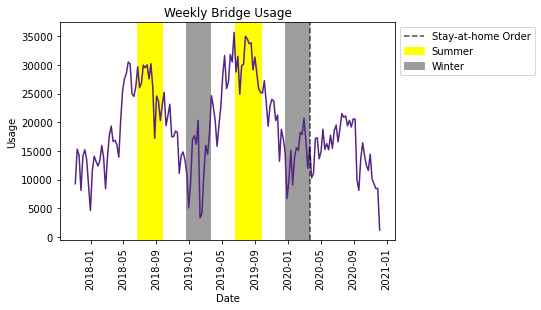

In [26]:
plt.plot(weekly.index, weekly['Total'], color = '#552583')
plt.axvspan(pd.to_datetime('2018-06-21'), pd.to_datetime('2018-09-22'), color = '#ffff00')
plt.axvspan(pd.to_datetime('2018-12-21'), pd.to_datetime('2019-03-20'), color = '#9d9d9d')
plt.axvspan(pd.to_datetime('2019-06-21'), pd.to_datetime('2019-09-23'), color = '#ffff00', label = 'Summer')
plt.axvspan(pd.to_datetime('2019-12-21'), pd.to_datetime('2020-03-19'), color = '#9d9d9d', label = 'Winter')
plt.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#000000', alpha = 0.7, label = 'Stay-at-home Order')  # https://www.seattletimes.com/seattle-news/inslee-to-hold-televised-address-monday-evening-to-announce-enhanced-strategies-on-covid-19/
plt.title('Weekly Bridge Usage')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.xticks(rotation = 90)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
plt.show()
plt.close()